# includes

In [1]:
from data_proc import DataProc
from capture_plot import CaptureOnClick

from datetime import datetime, timedelta
import os

%matplotlib widget
#%matplotlib inline
#%matplotlib notebook


In [ ]:
# print(mpf.__version__)

# simple flow

## Configure data input

In [2]:
TOTAL_CANDLES = 100
SYMBOL = 'BTCUSDT'
INTERVAL ='1m'

dtata_processor = DataProc()
pair_df, _, _ = dtata_processor.get_new_data()



In [4]:
print(pair_df.index[0:10])
print(pair_df[0:5])

DatetimeIndex(['2023-12-13 22:27:00', '2023-12-13 22:28:00',
               '2023-12-13 22:29:00', '2023-12-13 22:30:00',
               '2023-12-13 22:31:00', '2023-12-13 22:32:00',
               '2023-12-13 22:33:00', '2023-12-13 22:34:00',
               '2023-12-13 22:35:00', '2023-12-13 22:36:00'],
              dtype='datetime64[ns]', name='Date', freq=None)
                         Open      High       Low     Close    Volume
Date                                                                 
2023-12-13 22:27:00  43178.48  43198.22  43178.47  43192.83  32.81161
2023-12-13 22:28:00  43192.82  43220.27  43157.17  43210.00  98.36915
2023-12-13 22:29:00  43210.00  43234.00  43190.47  43233.99  20.16113
2023-12-13 22:30:00  43234.00  43234.00  43174.20  43174.21  31.83634
2023-12-13 22:31:00  43174.21  43184.00  43163.69  43171.99  35.99119


## Aquire selections
* left click places buy mark
* right click places sell mark
* shift+left click removes the nearest mark

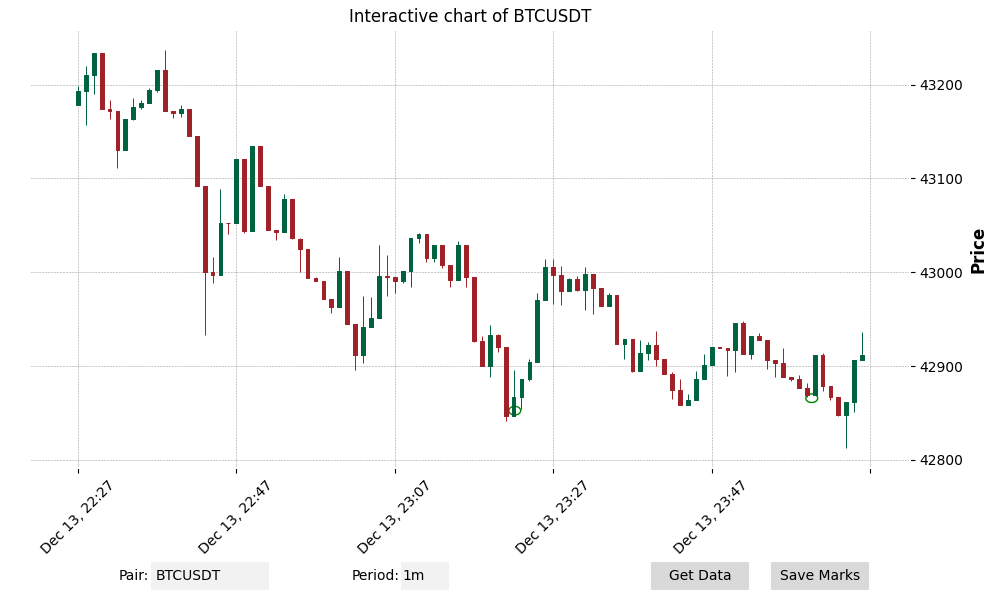

In [5]:
plotter = CaptureOnClick(pair_df, dtata_processor)

## Utils. 
* Store selections

In [5]:
# Save points to file
# plotter.save_m_to_file()

print(f'Default pair: {plotter.pair} default period: {plotter.period}')
   

Default pair: BTCUSDT default period: 1m


## debug print from chart, on mouse click 

In [6]:
print(plotter.captured_output)

Data coords: (58.1464125, 42852.377751008404) date clicked: 2023-12-13 23:22:00  figure coords: (403, 120)
